In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv("test.csv")
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [5]:
print(train_df.shape)
print(test_df.shape)

(1460, 81)
(1459, 80)


In [6]:
# checking columns with missing values
print(train_df.columns[train_df.isnull().any()])
print("\n")
print(test_df.columns[test_df.isnull().any()])

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')


## Data Preprocessing

In [7]:
# Fill missing values and encode categorical data
for column in train_df.columns:
    if train_df[column].dtype == 'object':
        train_df[column] = train_df[column].fillna(train_df[column].mode()[0])
    else:
        train_df[column] = train_df[column].fillna(train_df[column].median())

train_df = pd.get_dummies(train_df)

## Visualize Correlations using Heatmap¶


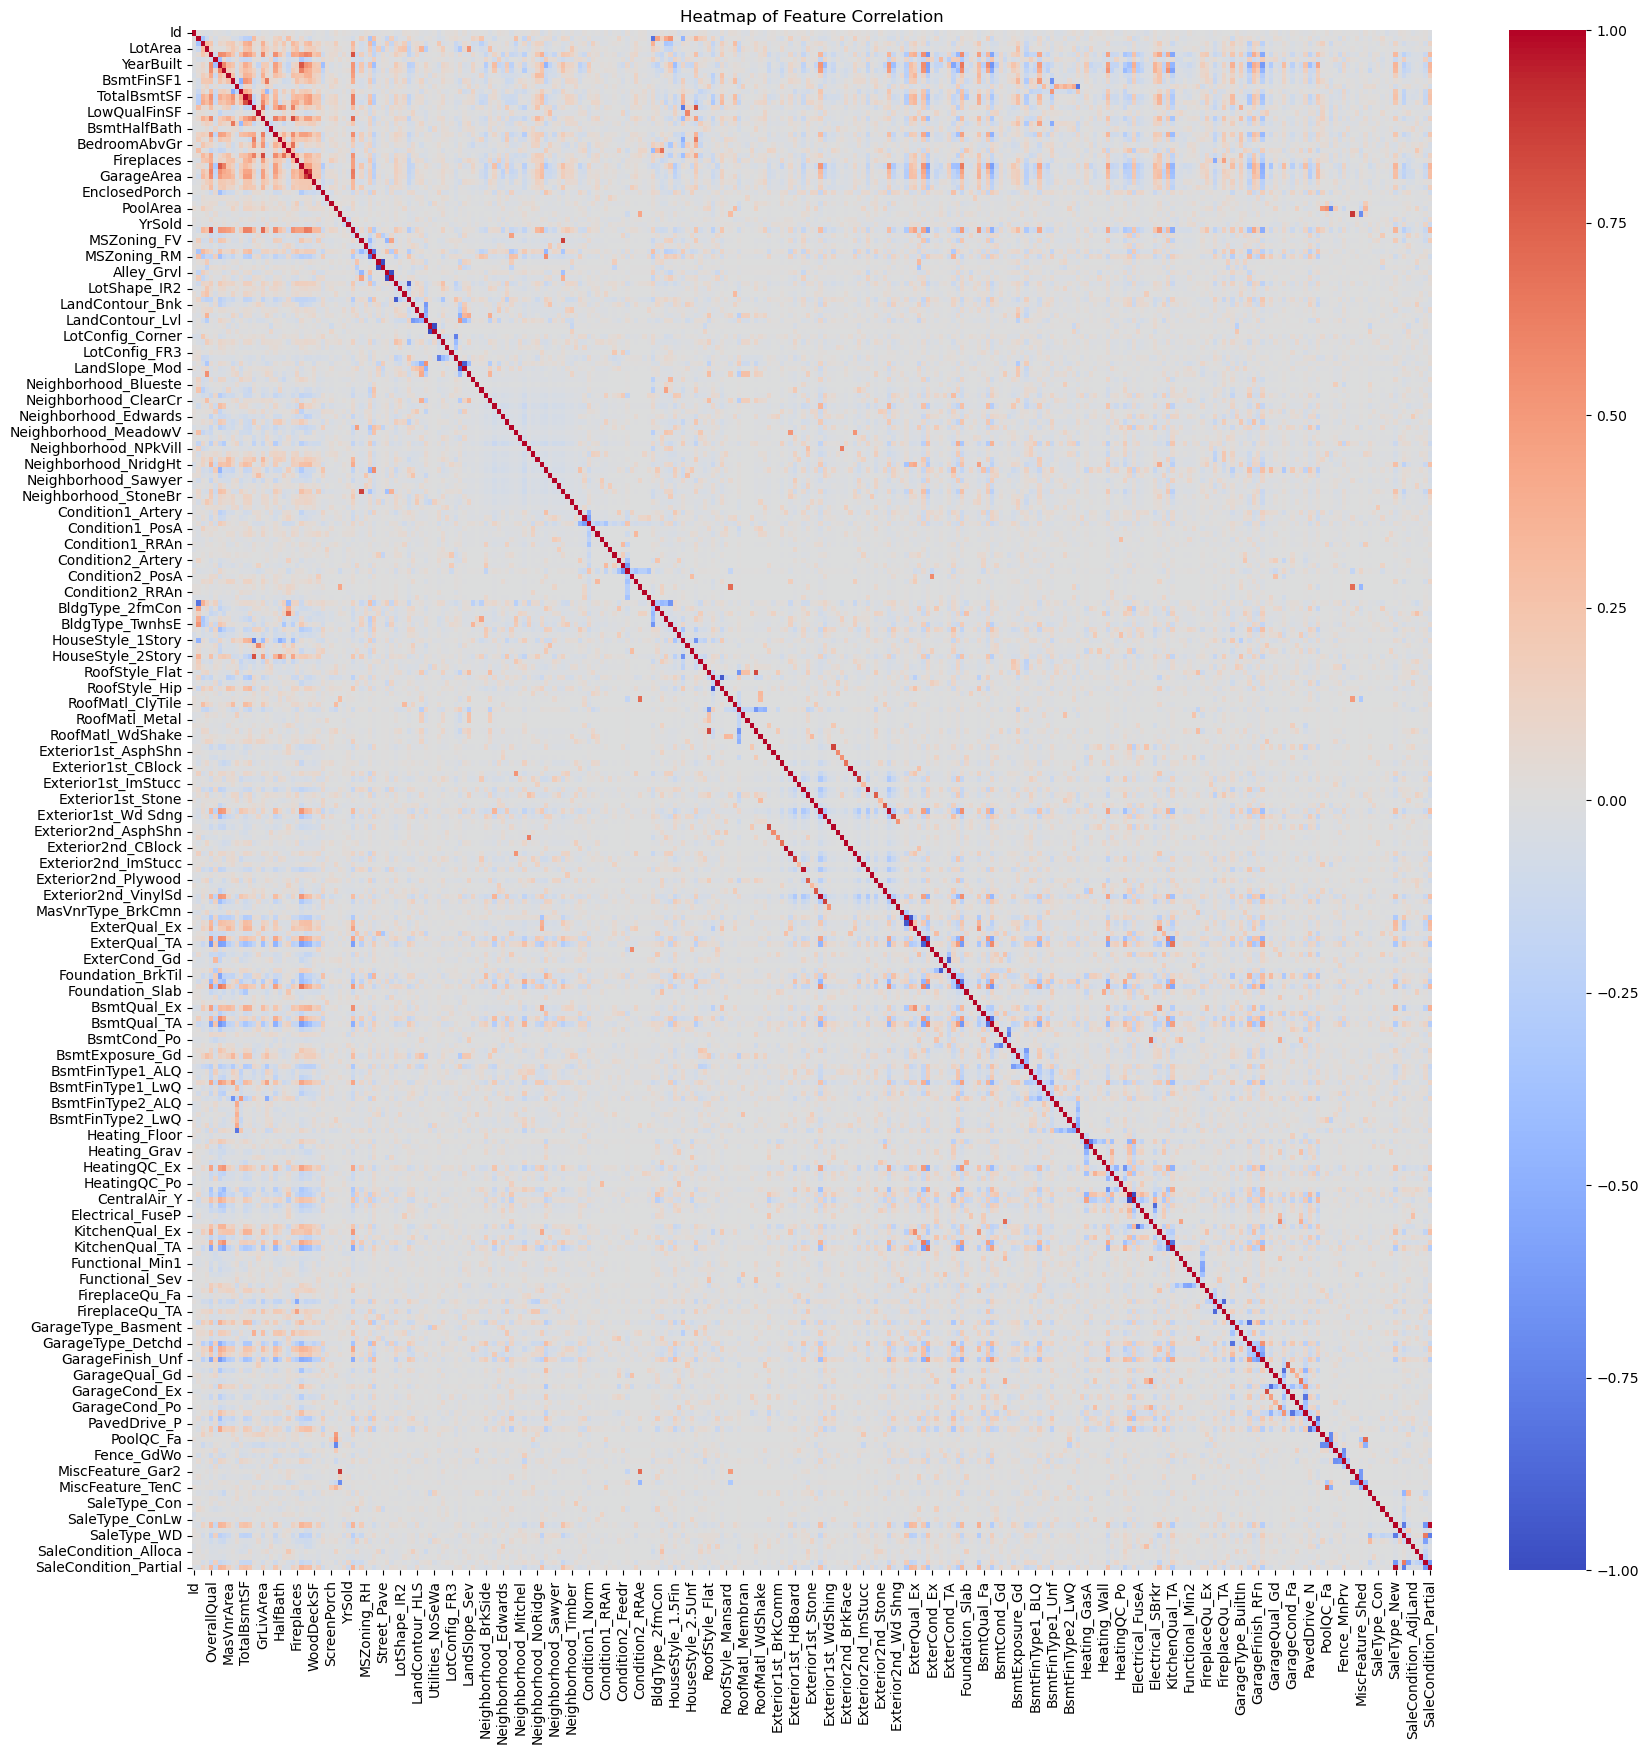

In [8]:
# Calculate correlation matrix
corr_matrix = train_df.corr()

# Plot heatmap
plt.figure(figsize=(20,20))  # Adjust size as necessary for visibility
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Heatmap of Feature Correlation')
plt.show()

# Select features based on a correlation threshold
threshold = 0.05  # Adjust the threshold as needed
selected_features = corr_matrix.index[abs(corr_matrix["SalePrice"]) > threshold].tolist()
selected_features.remove('SalePrice')  # Remove the target variable from features list

## splitting data into training and test

In [9]:
X = train_df[selected_features]
y = np.log(train_df['SalePrice'])  # Log-transform the target variable
# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Model training with linear regression

In [10]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

## Feature Importance from Linear Regression¶


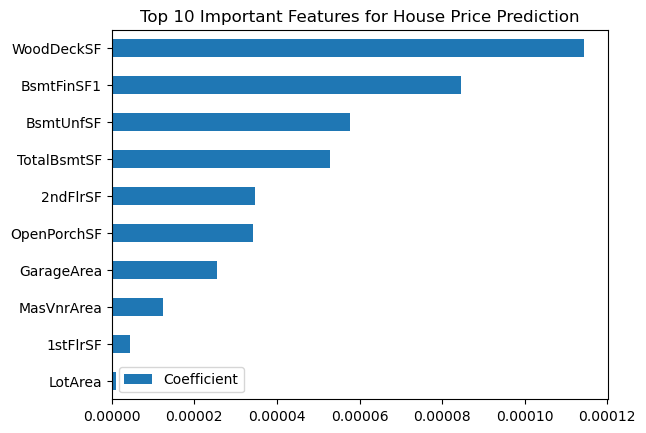

In [11]:
feature_importance = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficient'])
top_features = feature_importance.abs().sort_values(by='Coefficient', ascending=True).head(10)
top_features.plot(kind='barh')
plt.title('Top 10 Important Features for House Price Prediction')
plt.show()

In [12]:
# Predictions for validation set using Linear Regression
y_pred_linear = linear_model.predict(X_val)

## Model Evaluation for Linear Regression¶


In [13]:
# Predictions for validation set using Linear Regression
y_pred_linear = linear_model.predict(X_val)

# Ensure that the test data includes all columns used in the model, adding missing ones with a default value of 0
needed_columns = X.columns
test_df_with_all_columns = test_df.reindex(columns=needed_columns, fill_value=0)

# Additionally, ensure there are no NaN values across the dataframe 
test_df_with_all_columns.fillna(0, inplace=True)

# Use the corrected DataFrame for predictions
final_test = test_df_with_all_columns

test_predictions = linear_model.predict(final_test)

# Convert predictions back from log scale if the target was transformed during training
final_predictions = np.exp(test_predictions)

# Create and save the submission file
predicted_result = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': final_predictions
})
predicted_result

,Id,SalePrice
0,1461,134411.524464
1,1462,159088.632410
2,1463,180144.302595
3,1464,198893.461339
4,1465,173700.294252
...,...,...
1454,2915,366520.108767
1455,2916,117610.353630
1456,2917,178372.655618
1457,2918,391158.754555


In [15]:
predicted_result.to_csv('my_submission.csv', index=False)
print("Task 1 completed")

Task 1 completed
